In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
import numpy as np
import shap

# Análise Descritiva

In [2]:
dados = pd.read_excel('Bases_Final_ADS_Jun2021.xlsx', sheet_name='dados')

In [3]:
dados.describe()

,com_co,com_n,com_ne,com_s,com_se,ind_co,ind_n,ind_ne,ind_s,ind_se,...,pmc_a_s,temp_max_s,temp_min_s,pmc_r_s,pim_s,pmc_a_se,temp_max_se,temp_min_se,pmc_r_se,pim_se
count,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,...,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,499.413058,327.077018,949.482511,1058.505600,3399.487372,645.965645,1121.508683,2164.581106,2495.467859,7828.909078,...,84.451277,25.016701,16.035267,87.855248,96.298479,85.317993,27.535584,19.037744,84.211404,90.901443
std,117.082197,85.115276,230.050914,229.854143,622.482273,146.821214,122.253021,258.964022,260.203685,519.733801,...,19.000908,3.365524,3.297746,19.419767,9.619947,17.271913,2.002188,2.042238,18.971917,10.072189
min,283.104360,175.495300,539.451790,627.651660,2159.479470,364.326990,810.256280,1452.131560,1810.980190,6331.118910,...,46.932000,17.711111,8.993333,51.696000,64.969000,46.530450,22.314066,14.887778,45.084000,60.322438
25%,393.400500,241.178000,731.956970,850.131000,2848.940582,497.029030,1028.227250,1914.298240,2278.951250,7477.524742,...,70.594000,22.099031,12.986089,71.111000,90.718250,74.639963,25.738701,17.267983,70.202250,84.202900
50%,520.498000,340.640810,972.266000,1090.080000,3488.666500,693.921500,1140.072275,2215.213160,2557.742935,7783.614835,...,87.096000,25.251505,16.297009,91.070000,95.840000,89.454900,27.565394,19.429506,89.665000,91.069939
75%,602.572903,404.041558,1169.773077,1217.270647,3914.279410,769.517565,1228.590750,2394.268000,2693.228027,8272.468750,...,98.196820,28.089830,19.086559,101.420591,104.352478,96.392125,29.063378,20.868937,95.218902,97.190423
max,683.111370,460.262000,1390.622270,1552.666000,4571.717000,904.781750,1321.958000,2574.711000,3037.010600,8795.554000,...,132.299461,31.734409,22.198925,146.804402,116.958000,126.255031,32.022581,23.132233,137.334905,112.047328


In [4]:
null_df = pd.DataFrame({'Percentile':dados.isnull().sum()/len(dados), 'Count':dados.isnull().sum()})

In [5]:
null_df[null_df['Count'] > 0]

,Percentile,Count
com_co,0.096491,22
com_n,0.096491,22
com_ne,0.096491,22
com_s,0.096491,22
com_se,0.096491,22
ind_co,0.096491,22
ind_n,0.096491,22
ind_ne,0.096491,22
ind_s,0.096491,22
ind_se,0.096491,22


In [6]:
dados['renda_r'].interpolate(method='linear', inplace=True, limit_direction="backward")

In [7]:
dados['massa_r'].interpolate(method='linear', inplace=True, limit_direction="backward")

In [8]:
corr = dados.corr()

In [9]:
corr.style.background_gradient(cmap='coolwarm')

,com_co,com_n,com_ne,com_s,com_se,ind_co,ind_n,ind_ne,ind_s,ind_se,res_co,res_n,res_ne,res_s,res_se,renda_r,pop_ocup_br,massa_r,du,pmc_a_co,temp_max_co,temp_min_co,pmc_r_co,pim_co,pmc_a_n,temp_max_n,temp_min_n,pmc_r_n,pim_n,pmc_a_ne,temp_max_ne,temp_min_ne,pmc_r_ne,pim_ne,pmc_a_s,temp_max_s,temp_min_s,pmc_r_s,pim_s,pmc_a_se,temp_max_se,temp_min_se,pmc_r_se,pim_se
com_co,1.000000,0.955792,0.981137,0.939200,0.958105,0.921440,0.768324,-0.508743,0.852912,-0.115085,0.933046,0.912341,0.947405,0.895082,0.941377,0.326143,0.892268,0.645466,-0.060226,0.763916,0.269157,0.197010,0.765260,0.547725,0.807414,0.226191,0.521455,0.806587,0.586240,0.797396,0.239512,0.281308,0.818203,0.219642,0.843177,0.169419,0.221156,0.853300,0.007125,0.807075,0.210982,0.236746,0.853545,-0.169320
com_n,0.955792,1.000000,0.957162,0.837982,0.863760,0.957029,0.805292,-0.544701,0.864468,-0.135607,0.931010,0.970464,0.941381,0.850244,0.876835,0.392136,0.864672,0.707372,0.061051,0.754918,0.206316,0.043035,0.763333,0.698745,0.830055,0.397430,0.447840,0.838178,0.667873,0.792379,0.127976,0.109096,0.818415,0.261988,0.846442,-0.019093,0.036026,0.858861,0.056088,0.805674,0.028143,0.064724,0.859053,-0.108466
com_ne,0.981137,0.957162,1.000000,0.931524,0.948258,0.904402,0.761929,-0.567765,0.820569,-0.187855,0.929409,0.927330,0.962230,0.899392,0.927717,0.368710,0.880978,0.690618,-0.022894,0.721290,0.231095,0.178425,0.741392,0.526405,0.788733,0.189556,0.494035,0.804292,0.556544,0.773157,0.245494,0.298590,0.809256,0.202812,0.826188,0.178966,0.226460,0.860900,-0.061551,0.779455,0.199501,0.233097,0.849073,-0.243353
com_s,0.939200,0.837982,0.931524,1.000000,0.977391,0.816060,0.692898,-0.470244,0.746881,-0.143222,0.859659,0.795611,0.899154,0.933886,0.953245,0.262951,0.823975,0.567528,-0.120183,0.706873,0.239031,0.289552,0.711807,0.311536,0.737191,-0.036490,0.464752,0.737128,0.425312,0.747982,0.288356,0.401228,0.770394,0.126646,0.782516,0.388239,0.428779,0.807810,-0.124908,0.744680,0.387240,0.420122,0.795756,-0.295409
com_se,0.958105,0.863760,0.948258,0.977391,1.000000,0.817127,0.724516,-0.424939,0.756446,-0.088309,0.849950,0.804894,0.885333,0.880913,0.936248,0.177161,0.866441,0.508932,-0.104773,0.741868,0.306381,0.302610,0.758580,0.361243,0.747852,0.050010,0.523100,0.756949,0.461995,0.784188,0.339554,0.427276,0.807681,0.231566,0.792283,0.352158,0.394627,0.809237,-0.078590,0.769484,0.386821,0.379339,0.818183,-0.218826
ind_co,0.921440,0.957029,0.904402,0.816060,0.817127,1.000000,0.774991,-0.500252,0.895589,-0.091900,0.915967,0.932300,0.928971,0.858469,0.876760,0.397501,0.810329,0.698112,0.076286,0.773362,0.087442,-0.044795,0.749968,0.712605,0.835183,0.334819,0.327246,0.823411,0.669817,0.778565,-0.004691,-0.003412,0.788625,0.164700,0.853275,-0.091992,-0.034295,0.844082,0.154906,0.807689,-0.064001,0.020917,0.834628,-0.053119
ind_n,0.768324,0.805292,0.761929,0.692898,0.724516,0.774991,1.000000,-0.206373,0.742356,0.104751,0.693378,0.752084,0.733648,0.662906,0.736365,0.128278,0.721935,0.382560,0.162237,0.770354,0.145713,-0.016633,0.773724,0.586505,0.774190,0.302458,0.318034,0.759077,0.617659,0.794050,0.069670,0.072674,0.790809,0.376631,0.747424,-0.054627,-0.018644,0.721616,0.180817,0.772457,-0.015539,0.005010,0.786331,0.134874
ind_ne,-0.508743,-0.544701,-0.567765,-0.470244,-0.424939,-0.500252,-0.206373,1.000000,-0.302233,0.754299,-0.659974,-0.675902,-0.643297,-0.586718,-0.479832,-0.686375,-0.265159,-0.834750,0.159941,0.026706,0.022188,-0.144095,-0.045543,-0.254270,-0.184814,-0.047664,-0.306448,-0.270226,-0.057585,-0.052986,-0.035146,-0.126807,-0.158088,0.374997,-0.242043,-0.112788,-0.184314,-0.398232,0.525099,-0.097136,-0.041753,-0.241187,-0.273997,0.752749
ind_s,0.852912,0.864468,0.820569,0.746881,0.756446,0.895589,0.742356,-0.302233,1.000000,0.201316,0.807649,0.810340,0.816222,0.749856,0.791883,0.336275,0.777819,0.588547,0.046945,0.772210,0.085262,-0.092560,0.721954,0.688664,0.824640,0.326764,0.247499,0.776785,0.748421,0.768790,-0.029757,-0.045253,0.749405,0.237704,0.823624,-0.145894,-0.0

# Previsão

- Split data

In [10]:
train = dados[:206].loc[:, dados[:206].columns != 'data_tidy']
train_y = train['ind_se']
train_X = train.loc[:, train.columns != 'ind_se']
train_X = train_X.loc[:, 'renda_r':]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.33, random_state=42)

- ElasticNet Model

In [12]:
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)

Objective did not converge. You might want to increase the number of iterations. Duality gap: 3299017.2527760905, tolerance: 3768.7960667963825


ElasticNet(random_state=0)

- Plot predictions

In [13]:
y_predict = regr.predict(X_test)

In [14]:
month_24 = dados[206:].loc[:,'renda_r':]
predict_24 = regr.predict(month_24)

In [15]:
df = dados[['data_tidy', 'ind_se']][:206]
df['dados'] = 'blue'

df2 = pd.DataFrame(dados['data_tidy'][206:])
df2['ind_se'] = predict_24
df2['dados'] = 'red'

graph = pd.concat([df,df2])
grouped = graph.groupby('dados')

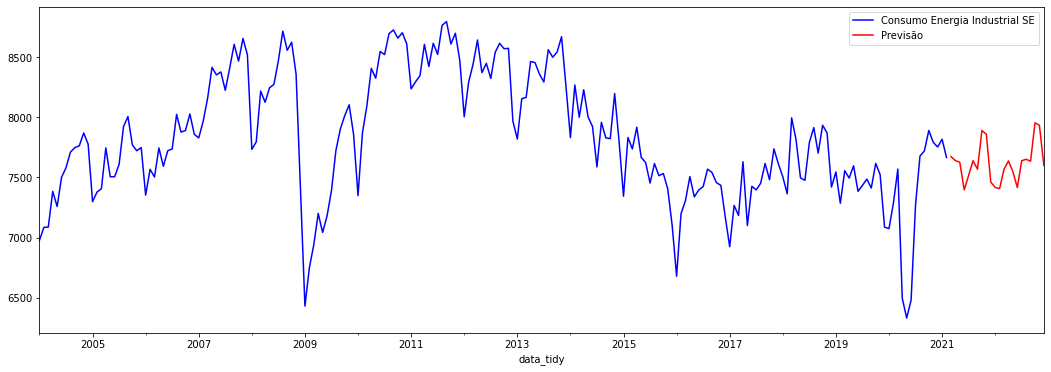

In [16]:
fig, ax = plt.subplots(figsize=(18, 6))

for key, group in grouped:
    group.plot(ax=ax, x="data_tidy", y="ind_se", label=key, color=key)
    
ax.legend(['Consumo Energia Industrial SE', 'Previsão'])

# Outros modelos

- Bayesian Ridge

In [17]:
BR = BayesianRidge(compute_score=True)
BR.fit(X_train, y_train)

BayesianRidge(compute_score=True)

In [18]:
y_predict_BR = BR.predict(X_test)

- Regressão de Lasso

In [19]:
LS = linear_model.Lasso(alpha=0.1)
LS.fit(X_train, y_train)

Objective did not converge. You might want to increase the number of iterations. Duality gap: 2996394.464493648, tolerance: 3768.7960667963825


Lasso(alpha=0.1)

In [20]:
y_predict_LS = LS.predict(X_test)

- Lasso Least Angle Regression

In [21]:
LL = linear_model.LassoLars(alpha=0.01)
LL.fit(X_train, y_train)

LassoLars(alpha=0.01)

In [22]:
y_predict_LL = LL.predict(X_test)

- Ridge

In [23]:
RD = Ridge(alpha=1.0)
RD.fit(X_train, y_train)

Ridge()

In [24]:
y_predict_RD = RD.predict(X_test)

# Métricas

A escolha dos modelos foi feita com o auxilio da ferramenta [PyCaret](https://pycaret.org/), na qual o quesito da escolha eram aqueles que apresentassem as melhores medidas de acurácia. O modelo ElasticNet apresentou o valor mais baixo para MAE, sendo assim a melhor valor de acurácia para essa medida.

- ElasticNet

In [25]:
print('MSE:', metrics.mean_squared_error(y_test,y_predict))
print('MAE:', metrics.mean_absolute_error(y_test,y_predict))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))  # RMSE
print('R2', metrics.r2_score(y_test,y_predict))

def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
 
def smape(y_true, y_pred):
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true))) * 100
 
 #  transfer 
print('MAPE', mape(y_test, y_predict))
print('SMAPE', smape(y_test, y_predict))

MSE: 60834.68037559554
MAE: 174.352966989635
RMSE 246.6468738411163
R2 0.7655765583818541
MAPE 2.291820732844402
SMAPE 2.2744706260892396


- Bayesian Ridge

In [26]:
print('MSE:', metrics.mean_squared_error(y_test,y_predict_BR))
print('MAE:', metrics.mean_absolute_error(y_test,y_predict_BR))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,y_predict_BR)))  # RMSE
print('R2', metrics.r2_score(y_test,y_predict_BR))

def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
 
def smape(y_true, y_pred):
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true))) * 100
 
 #  transfer 
print('MAPE', mape(y_test, y_predict_BR))
print('SMAPE', smape(y_test, y_predict_BR))

MSE: 63595.04843627782
MAE: 179.36602268656625
RMSE 252.18058695363095
R2 0.7549396161488587
MAPE 2.3590343795658315
SMAPE 2.3365167120790558


- Regressão de Lasso

In [27]:
print('MSE:', metrics.mean_squared_error(y_test,y_predict_LS))
print('MAE:', metrics.mean_absolute_error(y_test,y_predict_LS))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,y_predict_LS)))  # RMSE
print('R2', metrics.r2_score(y_test,y_predict_LS))

def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
 
def smape(y_true, y_pred):
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true))) * 100
 
 #  transfer 
print('MAPE', mape(y_test, y_predict_LS))
print('SMAPE', smape(y_test, y_predict_LS))

MSE: 58207.789683544535
MAE: 178.7279370165284
RMSE 241.26290573468714
R2 0.7756991521553936
MAPE 2.342369164214655
SMAPE 2.3281085976966724


- Lasso Least Angle Regression

In [28]:
print('MSE:', metrics.mean_squared_error(y_test,y_predict_LL))
print('MAE:', metrics.mean_absolute_error(y_test,y_predict_LL))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,y_predict_LL)))  # RMSE
print('R2', metrics.r2_score(y_test,y_predict_LL))

def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
 
def smape(y_true, y_pred):
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true))) * 100
 
 #  transfer 
print('MAPE', mape(y_test, y_predict_LL))
print('SMAPE', smape(y_test, y_predict_LL))

MSE: 58790.91520956736
MAE: 178.82528134161663
RMSE 242.46837981387876
R2 0.7734521066895231
MAPE 2.3424495177071263
SMAPE 2.328889167032756


- Ridge

In [29]:
print('MSE:', metrics.mean_squared_error(y_test,y_predict_RD))
print('MAE:', metrics.mean_absolute_error(y_test,y_predict_RD))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,y_predict_RD)))  # RMSE
print('R2', metrics.r2_score(y_test,y_predict_RD))

def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
 
def smape(y_true, y_pred):
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true))) * 100
 
 #  transfer 
print('MAPE', mape(y_test, y_predict_RD))
print('SMAPE', smape(y_test, y_predict_RD))

MSE: 57598.30825674447
MAE: 176.81649156221255
RMSE 239.99647550900508
R2 0.7780477587855374
MAPE 2.318743395765914
SMAPE 2.3043785703711213


# Variáveis

In [30]:
X_train_summary = shap.kmeans(X_train, 10)

In [31]:
ex = shap.KernelExplainer(regr.predict, X_train_summary)

In [32]:
shap.initjs()

In [33]:
shap_values = ex.shap_values(X_test.iloc[0,:])

In [34]:
shap.force_plot(ex.expected_value, shap_values, X_test.iloc[0,:])

  0%|          | 0/68 [00:00<?, ?it/s]

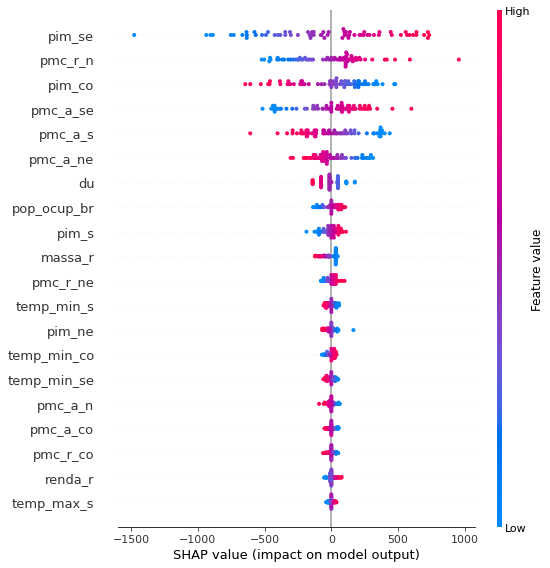

In [35]:
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

# Conclusões

Durante a fase descritiva, percebeu que a variável de consumo de energia pela indústria, na região sudeste, correlaciona-se muito pouco com as outras variáveis. Entretanto, destacam-se o consumo energético industrial do nordeste e a produção insdustrial do sudeste como sendo variáveis altamente correlacionadas com o consumo energético industrial do sudeste. A previsão mostrou que haverá um leve aumento no consumo energético das industrias do sudeste nos próximos 24 meses. A variável de produção industrial do sudeste mostrou ser a com maior poder explicativo no modelo preditivo.